# PHOTONUCLEAR

Input:
   * double Z - The charge number of the target atom.
   * double A - The mass number of the target atom.
   * double mass - The projectile rest mass, in GeV
   * double K - The projectile initial kinetic energy.
   * double q - The kinetic energy lost to the photon.
  

Output:
    DCS in m^2/kg.

### Definitions and Applicability

Theory from: https://arxiv.org/pdf/hep-ph/9712415.pdf, https://arxiv.org/pdf/hep-ph/0012350.pdf


The differential cross section can be written in the form

\begin{equation}
\frac{\text{d}\sigma(x, Q^2)}{\text{d}Q^2\text{d}x} = \frac{4\pi\alpha^2}{Q^4}\frac{F_2(x, Q^2)}{x}(1-y-\frac{Mxy}{2E} + (1 - \frac{2m_l^2}{Q^2})\frac{y^2(1 + \frac{4M^2x^2}{Q^2})}{2(1 + R(x, Q^2))})
\end{equation}

Where $F_2$ - a nucleon structure function

\begin{equation}
F_2(x, Q^2) = \frac{Q^2}{Q^2 + m_0^2} (F_2^P(x, Q^2) + F_2^R(x, Q^2))
\end{equation}

\begin{equation}
F_2 ^{R}(x, Q^{2}) = c_R(t)x_R^{a_R(t)}(1 - x)^{b_R(t)} 
= c_R(t)e^{a_R(t)\ln x_R+ b_R(t)\ln(1 - x)}
\end{equation}

\begin{equation}
F_2 ^{P}(x, Q^{2}) = c_P(t)x_P^{a_P(t)}(1 - x)^{b_P(t)} 
= c_P(t)e^{\ln(x_P^{a_P(t)}(1 - x)^{b_P(t)})}
= c_P(t)e^{\ln x_P^{a_P(t)}+ \ln(1 - x)^{b_P(t)}}
= c_P(t)e^{a_P(t)\ln x_P+ b_P(t)\ln(1 - x)}
\end{equation}

Take $x$ as $x = \frac{Q^2}{2Mq}$

\begin{equation}
\frac{\text{d}\sigma(x, Q^2)}{\text{d}Q^2\text{d}x} = \frac{4\pi\alpha^2 F_2}{Q^4} \frac{2Mq}{Q^2}(1 - y - \frac{My}{2E}\frac{Q^2}{2Mq} + (1 - \frac{2m_l^2}{Q^2})\frac{y^2(1 + (\frac{2MQ^2}{2MqQ})^2)}{2(1 + R)})
\end{equation}

\begin{equation}
\frac{\text{d}\sigma(x, Q^2)}{\text{d}Q^2\text{d}x} = \frac{8\pi\alpha^2F_2Mq}{Q^6}(1 - y - \frac{Q^2y}{4Eq} + (1 - \frac{2m_l^2}{Q^2}) \frac{y^2 + (y\frac{Q}{q})^2}{2(1 + R)})
\end{equation}

Take into account, that $y = \frac{q}{E}$ 

\begin{equation}
\frac{\text{d}\sigma(x, Q^2)}{\text{d}Q^2\text{d}x} = \frac{8\pi\alpha^2F_2Mq}{Q^6}(1 - y - \frac{Q^2}{4E^2} + (1 - \frac{2m_l^2}{Q^2}) \frac{y^2 + \frac{Q^2}{E^2}}{2(1 + R)})
\end{equation}

\begin{equation}
\frac{\text{d}\sigma(x, Q^2)}{\text{d}Q^2\text{d}x} = \frac{8\pi\alpha^2F_2Mq}{Q^6}(1 - y  + (1 - \frac{2m_l^2}{Q^2}) \frac{y^2 + \frac{Q^2}{E^2}}{2(1 + R)}) - \frac{8\pi\alpha^2F_2Mq}{Q^6}\frac{Q^2}{4E^2}
\end{equation}

\begin{equation}
\frac{\text{d}\sigma(x, Q^2)}{\text{d}Q^2\text{d}x} = \frac{8\pi\alpha^2F_2Mq}{Q^6}(1 - y  + (1 - \frac{2m_l^2}{Q^2}) \frac{y^2 + \frac{Q^2}{E^2}}{2(1 + R)}) - \frac{8\pi\alpha^2F_2Mq}{4Q^4E^2}
\end{equation}

\begin{equation}
\frac{\text{d}\sigma(x, Q^2)}{\text{d}Q^2\text{d}x} = \frac{8\pi\alpha^2F_2Mq}{Q^2}((\frac{1 - y  + \frac{1}{2}(1 - \frac{2m_l^2}{Q^2}) \frac{y^2 + \frac{Q^2}{E^2}}{1 + R}}{Q^4}) - \frac{1}{4Q^2E^2})
\end{equation}

Let's see on $x = \frac{Q^2}{2Mq}$

\begin{equation}
\frac{\text{d}x}{\text{d}q} = \frac{-Q^2}{2Mq^2}
\end{equation}

And
\begin{equation}
\frac{\text{d}\sigma(x, Q^2)}{\text{d}Q^2\text{d}q}\frac{2Mq^2}{-Q^2} = \frac{8\pi\alpha^2F_2Mq}{Q^2}((\frac{1 - y  + \frac{1}{2}(1 - \frac{2m_l^2}{Q^2}) \frac{y^2 + \frac{Q^2}{E^2}}{1 + R}}{Q^4}) - \frac{1}{4Q^2E^2})
\end{equation}

\begin{equation}
\frac{\text{d}\sigma(x, Q^2)}{\text{d}Q^2\text{d}q} = \frac{-4\pi\alpha^2F_2}{q}((\frac{1 - y  + \frac{1}{2}(1 - \frac{2m_l^2}{Q^2}) \frac{y^2 + \frac{Q^2}{E^2}}{1 + R}}{Q^4}) - \frac{1}{4Q^2E^2})
\end{equation}

<font color='red'>
\begin{equation}
\frac{\text{cf} F_2}{q} (\frac{1-y+\frac{1}{2}(1 - \frac{2m_l^2}{Q^2}) \frac {y^2 + \frac{Q^2}{E^2}}{1 + R}}{Q^4} - \frac{1}{4E^2Q^2})
\end{equation}
    </font>

In [ ]:
cf = 2.603096E-35

Then integrate this equation from $Q_\text{min}^2 = \frac{m_l^2y^2}{1 - y} $ to $Q_\text{max}^2 = 2MEy - ((M + m_\pi)^2 - M^2) $


\begin{equation}
\frac{\text{d}\sigma}{\text{d}q} = \int{\frac{\text{d}\sigma(x, Q^2)}{\text{d}Q^2\text{d}q}}\text{d}Q^2
\end{equation}

In [ ]:
import constants
import math

# see https://github.com/grinisrit/noa/blob/7245bb446deb2415c3ecf92c4561c065625072bc/include/noa/pms/dcs.hh#L289

# /** ALLM97 parameterisation of the proton structure function, F2.
#  *
#  * @param x       The fractional kinetic energy lost to the photon.
#  * @param Q2      The negative four momentum squared.
#  * @return The corresponding value of the proton structure function, F2.
#  *
#  * References:
#  *      DESY 97-251 [arXiv:hep-ph/9712415].
#  */

def dcs_photonuclear_f2_allm(x, Q2):

        m02 = 0.31985
        mP2 = 49.457
        mR2 = 0.15052
        Q02 = 0.52544
        Lambda2 = 0.06527

        cP1 = 0.28067
        cP2 = 0.22291
        cP3 = 2.1979
        aP1 = -0.0808
        aP2 = -0.44812
        aP3 = 1.1709
        bP1 = 0.36292
        bP2 = 1.8917
        bP3 = 1.8439

        cR1 = 0.80107
        cR2 = 0.97307
        cR3 = 3.4942
        aR1 = 0.58400
        aR2 = 0.37888
        aR3 = 2.6063
        bR1 = 0.01147
        bR2 = 3.7582
        bR3 = 0.49338

        M2 = 0.8803505929
        W2 = M2 + Q2 * (1.0 / x - 1.0)

        

In [ ]:
t = log(log((Q2 + Q02) / Lambda2) / log(Q02 / Lambda2))

\begin{equation}
t = \ln\frac{\ln(\frac{Q^2 + Q_0^2}{\Lambda})}{\ln(\frac{Q_0^2}{\Lambda^2})}
\end{equation}

In [ ]:
xP = (Q2 + mP2) / (Q2 + mP2 + W2 - M2)

\begin{equation}
\frac{1}{x_P} = 1 + \frac{W^2 - M^2}{Q^2 + m_P^2}
\end{equation}

In [ ]:
xR = (Q2 + mR2) / (Q2 + mR2 + W2 - M2)

\begin{equation}
\frac{1}{x_R} = 1 + \frac{W^2 - M^2}{Q^2 + m_R^2}
\end{equation}

In [ ]:
lnt = log(t)
cP = cP1 + (cP1 - cP2) * (1.0 / (1.0 + exp(cP3 * lnt)) - 1.0)
aP = aP1 + (aP1 - aP2) * (1.0 / (1.0 + exp(aP3 * lnt)) - 1.0)
bP = bP1 + bP2 * exp(bP3 * lnt)
cR = cR1 + cR2 * exp(cR3 * lnt)
aR = aR1 + aR2 * exp(aR3 * lnt)
bR = bR1 + bR2 * exp(bR3 * lnt)

In [ ]:
F2P = cP * exp(aP * log(xP) + bP * log(1 - x))

\begin{equation}
F_2 ^{P}(x, Q^{2}) = c_P(t)x_P^{a_P(t)}(1 - x)^{b_P(t)} 
= c_P(t)e^{\ln(x_P^{a_P(t)}(1 - x)^{b_P(t)})}
= c_P(t)e^{\ln x_P^{a_P(t)}+ \ln(1 - x)^{b_P(t)}}
= c_P(t)e^{a_P(t)\ln x_P+ b_P(t)\ln(1 - x)}
\end{equation}

In [ ]:
F2R = cR * exp(aR * log(xR) + bR * log(1 - x))

\begin{equation}
F_2 ^{R}(x, Q^{2}) = c_R(t)x_R^{a_R(t)}(1 - x)^{b_R(t)} 
= c_R(t)e^{a_R(t)\ln x_R+ b_R(t)\ln(1 - x)}
\end{equation}

In [ ]:
 return Q2 / (Q2 + m02) * (F2P + F2R)

\begin{equation}
F_2(x, Q^2) = \frac{Q^2}{Q^2 + m_0^2} (F_2^P(x, Q^2) + F_2^R(x, Q^2))
\end{equation}

In [ ]:
def dcs_photonuclear_f2a_drss(x, F2p, A):

        a = 1.0
        if (x < 0.0014):
                a = exp(-0.1 * log(A))
        elif (x < 0.04):
                a = exp((0.069 * log10(x) + 0.097) * log(A))
 

In [ ]:
 return (0.5 * A * a *(2.0 + x * (-1.85 + x * (2.45 + x * (-2.35 + x)))) * F2p)

\begin{equation}
F_2^{A} = a(A, x)\frac{A}{2}(1 + P(x))F_2^p
\end{equation}


\begin{equation}
P(x) = 1 - 1.85x + 2.45x^2 - 2.35x^3 + x^4
\end{equation}

  The R ratio of longitudinal to transverse structure functions.
  
  * @param x       The fractional kinetic energy lost to the photon.
  * @param Q2      The negative four momentum squared.
  
  References: https://inspirehep.net/files/d4b4fcdb5d834b34d41d3226090c37ea
  

In [ ]:
def dcs_photonuclear_r_whitlow(x, Q2):

        q2 = Q2
        if (Q2 < 0.3): 
            q2 = 0.3

In [ ]:
        theta = 1 + 12.0 * q2 / (1.0 + q2) * 0.015625 / (0.015625 + x * x)

\begin{equation}
\theta = 1 + 12(\frac{Q^2}{Q^2+1})(\frac{0.125^2}{0.125^2 + x^2})
\end{equation}

In [ ]:
        return (0.635 / log(q2 / 0.04) * theta + 0.5747 / q2 -
            0.3534 / (0.09 + q2 * q2))


\begin{equation}
R = \frac{b_1}{\ln(Q^2/\Lambda^2)}\Theta(x, Q^2) + \frac{b_2}{Q^2} + \frac{b_3}{Q^4+0.3^2},
\end{equation}

where $\Lambda = 0.2GeV$, and


$b_1 = 0.635 $
$b_2 = 0.5747 $
$b_3 = -0.3534$ 


   The doubly differential cross sections d^2S/(dq*dQ2) for photonuclear
   interactions.
  
   * @param ml      The projectile mass.
   * @param A       The target atomic weight.
   * @param K       The projectile initial kinetic energy.
   * @param q       The kinetic energy lost to the photon.
   * @param Q2      The negative four momentum squared.
   * @return The doubly differential cross section in m^2/kg/GeV^3.
  
   References: Dutta et al., Phys.Rev. D63 (2001) 094020 [arXiv:hep-ph/0012350].
 

In [ ]:
def dcs_photonuclear_d2(A, ml, K, q, Q2):

        cf = 2.603096E-35
        M = 0.931494 #nucleon mass GeV
        E = K + ml

        y = q / E
        x = 0.5 * Q2 / (M * q)
        F2p = dcs_photonuclear_f2_allm(x, Q2)
        F2A = dcs_photonuclear_f2a_drss(x, F2p, A)

In [ ]:
        R = dcs_photonuclear_r_whitlow(x, Q2)

In [ ]:
        dds = (1 - y + 0.5 * (1 - 2 * ml * ml / Q2) *(y * y + Q2 / (E * E)) / (1 + R)) /(Q2 * Q2) - 0.25 / (E * E * Q2)

\begin{equation}
\text{dds} = \frac{1-y+\frac{1}{2}(1 - \frac{2m_l^2}{Q^2}) \frac {y^2 + \frac{Q^2}{E^2}}{1 + R}}{Q^4} - \frac{1}{4E^2Q^2}
\end{equation}

In [ ]:
        return cf * F2A * dds / q

\begin{equation}
\frac{\text{cf} F_2}{q} (\frac{1-y+\frac{1}{2}(1 - \frac{2m_l^2}{Q^2}) \frac {y^2 + \frac{Q^2}{E^2}}{1 + R}}{Q^4} - \frac{1}{4E^2Q^2})
\end{equation}

In [ ]:
# Wrapper for the photonuclear differential cross section.

# @param Physics Handle for physics tables.
# @param element The target atomic element.
# @param K       The projectile initial kinetic energy.
# @param q       The kinetic energy lost to the photon.
# @return The differential cross section in m^2/kg.
 
#   The photonuclear differential cross-section is computed following DRSS,
#   with ALLM97 parameterisation of the structure function F2.
 
#   References:
#        Dutta et al., Phys.Rev. D63 (2001) 094020 [arXiv:hep-ph/0012350].
 

def dcs_photonuclear(Z, A, ml, K, q):

# Coefficients for the Gaussian quadrature from:
# https://pomax.github.io/bezierinfo/legendre-gauss.html.
 
    N_GQ = 9
    xGQ = [N_GQ]
    wQ = [N_GQ]
    
    xGQ = [ 0.0000000000000000, -0.8360311073266358,
                0.8360311073266358, -0.9681602395076261, 0.9681602395076261,
                -0.3242534234038089, 0.3242534234038089, -0.6133714327005904,
                0.6133714327005904 ]
    wGQ = [ 0.3302393550012598, 0.1806481606948574,
                0.1806481606948574, 0.0812743883615744, 0.0812743883615744,
                0.3123470770400029, 0.3123470770400029, 0.2606106964029354,
                0.2606106964029354 ]

    M = 0.931494
    mpi = 0.134977
    doE = K + ml

    ds = 0.
    if ((q >= (E - ml)) or (q <= (mpi * (1.0 + 0.5 * mpi / M)))):
        return ds

    y = q / E
    Q2min = ml * ml * y * y / (1 - y)
    Q2max = 2.0 * M * (q - mpi) - mpi * mpi
    if ((Q2max < Q2min) | (Q2min < 0)):
        return ds

    # Set the binning.
    pQ2min = math.log(Q2min)
    pQ2max = math.log(Q2max)
    dpQ2 = pQ2max - pQ2min
    pQ2c = 0.5 * (pQ2max + pQ2min)

        
    # Integrate the doubly differential cross-section over Q2 using
    # a Gaussian quadrature. Note that 9 points are enough to get a
    # better than 0.1 % accuracy.
         
    for i in range(N_GQ): 
        Q2 = math.exp(pQ2c + 0.5 * dpQ2 * xGQ[i])
        ds += dcs_photonuclear_d2(A, ml, K, q, Q2) * Q2 * wGQ[i]

    if (ds < 0.):
        ds = 0.
    return 0.0 if 0.5 * ds * dpQ2 < 0 else 0.5 * ds * dpQ2*1E+3 * double(constants.AVOGADRO_NUMBER) * (ml + K) / A

# Utility function for checking the consistency of the Photonuclear model.

# @param K The kinetic energy.
# @param q The kinetic energy lost to the photon.
# @return `0` if the model is valid.

# Check for the limit of the PDG model. Below this kinetic transfer a
# tabulation is used, which we don't do. Therefore we set the cross-section to
# zero below 1 GeV where it deviates from the model. In addition, for x < 2E-03
# the model is unstable and can lead to osccilations and negative cross-section
# values.

def dcs_photonuclear_check(K, q):

    return (q < 1.) or (q < 2E-03 * K)


### Usage example

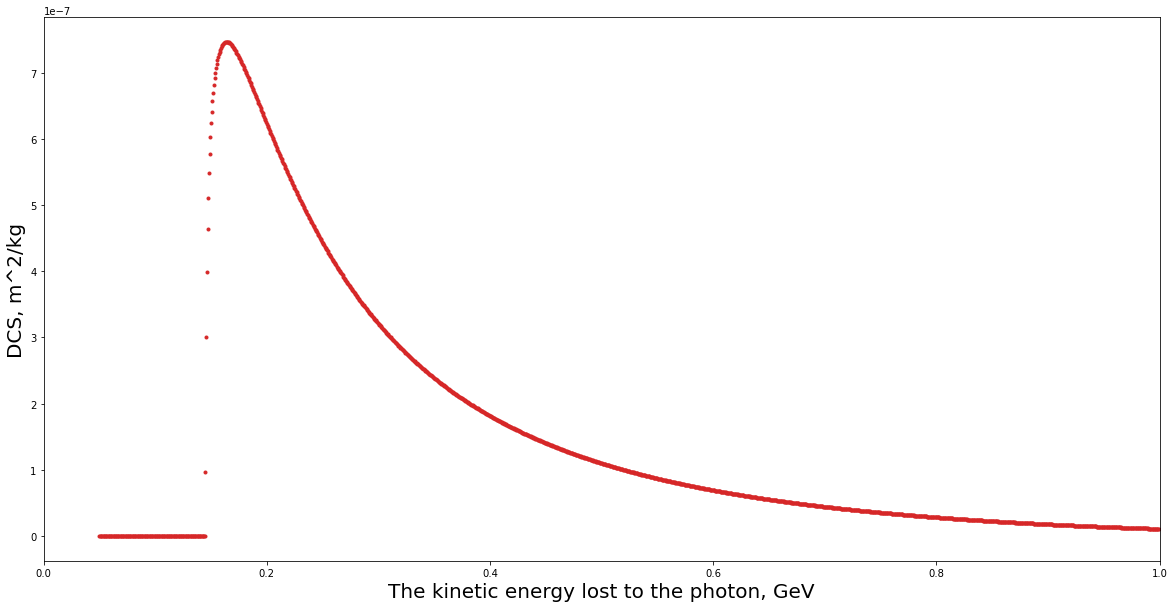

In [27]:
import constants
import math
import numpy as np
from numba import njit, double, int32

# see https://github.com/grinisrit/noa/blob/7245bb446deb2415c3ecf92c4561c065625072bc/include/noa/pms/dcs.hh#L289

# /** ALLM97 parameterisation of the proton structure function, F2.
#  *
#  * @param x       The fractional kinetic energy lost to the photon.
#  * @param Q2      The negative four momentum squared.
#  * @return The corresponding value of the proton structure function, F2.
#  *
#  * References:
#  *      DESY 97-251 [arXiv:hep-ph/9712415].
#  */

def dcs_photonuclear_f2_allm(x, Q2):

        m02 = 0.31985
        mP2 = 49.457
        mR2 = 0.15052
        Q02 = 0.52544
        Lambda2 = 0.06527

        cP1 = 0.28067
        cP2 = 0.22291
        cP3 = 2.1979
        aP1 = -0.0808
        aP2 = -0.44812
        aP3 = 1.1709
        bP1 = 0.36292
        bP2 = 1.8917
        bP3 = 1.8439

        cR1 = 0.80107
        cR2 = 0.97307
        cR3 = 3.4942
        aR1 = 0.58400
        aR2 = 0.37888
        aR3 = 2.6063
        bR1 = 0.01147
        bR2 = 3.7582
        bR3 = 0.49338

        M2 = 0.8803505929
        W2 = M2 + Q2 * (1.0 / x - 1.0)
        t = math.log(math.log((Q2 + Q02) / Lambda2) / math.log(Q02 / Lambda2))
        xP = (Q2 + mP2) / (Q2 + mP2 + W2 - M2)
        xR = (Q2 + mR2) / (Q2 + mR2 + W2 - M2)
        lnt = math.log(t)
        cP = cP1 + (cP1 - cP2) * (1.0 / (1.0 + math.exp(cP3 * lnt)) - 1.0)
        aP = aP1 + (aP1 - aP2) * (1.0 / (1.0 + math.exp(aP3 * lnt)) - 1.0)
        bP = bP1 + bP2 * math.exp(bP3 * lnt)
        cR = cR1 + cR2 * math.exp(cR3 * lnt)
        aR = aR1 + aR2 * math.exp(aR3 * lnt)
        bR = bR1 + bR2 * math.exp(bR3 * lnt)

        F2P = cP * math.exp(aP * math.log(xP) + bP * math.log(1 - x))
        F2R = cR * math.exp(aR * math.log(xR) + bR * math.log(1 - x))

        return Q2 / (Q2 + m02) * (F2P + F2R)

# /* The F2 structure function for atomic weight A.
#  *
#  * @param x       The fractional kinetic energy lost to the photon.
#  * @param F2p     The proton structure function, F2.
#  * @param A       The atomic weight.
#  * @return The corresponding value of the structure function, F2.
#  *
#  * The F2 structure function for a nucleus of atomic weight A is computed
#  * according to DRSS, including a Shadowing factor.
#  *
#  * References:
#  *      Dutta et al., Phys.Rev. D63 (2001) 094020 [arXiv:hep-ph/0012350].
#  */       


def dcs_photonuclear_f2a_drss(x, F2p, A):

        a = 1.0
        if (x < 0.0014):
                a = math.exp(-0.1 * math.log(A))
        elif (x < 0.04):
                a = math.exp((0.069 * math.log10(x) + 0.097) * math.log(A))

        return (0.5 * A * a *
            (2.0 + x * (-1.85 + x * (2.45 + x * (-2.35 + x)))) * F2p)


# /* The R ratio of longitudinal to transverse structure functions.
#  *
#  * @param x       The fractional kinetic energy lost to the photon.
#  * @param Q2      The negative four momentum squared.
#  *
#  * References:
#  *      Whitlow, SLAC-PUB-5284.
#  */

def dcs_photonuclear_r_whitlow(x, Q2):

        q2 = Q2
        if (Q2 < 0.3): 
            q2 = 0.3

        theta = 1 + 12.0 * q2 / (1.0 + q2) * 0.015625 / (0.015625 + x * x)

        return (0.635 / math.log(q2 / 0.04) * theta + 0.5747 / q2 -
            0.3534 / (0.09 + q2 * q2))


#   The doubly differential cross sections d^2S/(dq*dQ2) for photonuclear
#   interactions.
#  
#   @param ml      The projectile mass.
#   @param A       The target atomic weight.
#   @param K       The projectile initial kinetic energy.
#   @param q       The kinetic energy lost to the photon.
#   @param Q2      The negative four momentum squared.
#   @return The doubly differential cross section in m^2/kg/GeV^3.
#  
#   References:
#        Dutta et al., Phys.Rev. D63 (2001) 094020 [arXiv:hep-ph/0012350].
# 
 
def dcs_photonuclear_d2(A, ml, K, q, Q2):

        cf = 2.603096E-35
        M = 0.931494
        E = K + ml

        y = q / E
        x = 0.5 * Q2 / (M * q)
        F2p = dcs_photonuclear_f2_allm(x, Q2)
        F2A = dcs_photonuclear_f2a_drss(x, F2p, A)
        R = dcs_photonuclear_r_whitlow(x, Q2)

        dds = (1 - y + 0.5 * (1 - 2 * ml * ml / Q2) *(y * y + Q2 / (E * E)) / (1 + R)) /(Q2 * Q2) - 0.25 / (E * E * Q2)

        return cf * F2A * dds / q

# Wrapper for the photonuclear differential cross section.

# @param Physics Handle for physics tables.
# @param element The target atomic element.
# @param K       The projectile initial kinetic energy.
# @param q       The kinetic energy lost to the photon.
# @return The differential cross section in m^2/kg.
 
#   The photonuclear differential cross-section is computed following DRSS,
#   with ALLM97 parameterisation of the structure function F2.
 
#   References:
#        Dutta et al., Phys.Rev. D63 (2001) 094020 [arXiv:hep-ph/0012350].
 

def dcs_photonuclear(Z, A, ml, K, q):

# Coefficients for the Gaussian quadrature from:
# https://pomax.github.io/bezierinfo/legendre-gauss.html.
 
    N_GQ = 9
    xGQ = [N_GQ]
    wQ = [N_GQ]
    
    xGQ = [ 0.0000000000000000, -0.8360311073266358,
                0.8360311073266358, -0.9681602395076261, 0.9681602395076261,
                -0.3242534234038089, 0.3242534234038089, -0.6133714327005904,
                0.6133714327005904 ]
    wGQ = [ 0.3302393550012598, 0.1806481606948574,
                0.1806481606948574, 0.0812743883615744, 0.0812743883615744,
                0.3123470770400029, 0.3123470770400029, 0.2606106964029354,
                0.2606106964029354 ]

    M = 0.931494
    mpi = 0.134977
    doE = K + ml

    ds = 0.
    if ((q >= (E - ml)) or (q <= (mpi * (1.0 + 0.5 * mpi / M)))):
        return ds

    y = q / E
    Q2min = ml * ml * y * y / (1 - y)
    Q2max = 2.0 * M * (q - mpi) - mpi * mpi
    if ((Q2max < Q2min) | (Q2min < 0)):
        return ds

    # Set the binning.
    pQ2min = math.log(Q2min)
    pQ2max = math.log(Q2max)
    dpQ2 = pQ2max - pQ2min
    pQ2c = 0.5 * (pQ2max + pQ2min)

        
    # Integrate the doubly differential cross-section over Q2 using
    # a Gaussian quadrature. Note that 9 points are enough to get a
    # better than 0.1 % accuracy.
         
    for i in range(N_GQ): 
        Q2 = math.exp(pQ2c + 0.5 * dpQ2 * xGQ[i])
        ds += dcs_photonuclear_d2(A, ml, K, q, Q2) * Q2 * wGQ[i]

    if (ds < 0.):
        ds = 0.
#     return 0.0 if (0.5 * ds * dpQ2) < 0 else 0.5 * ds * dpQ2*1E+3 * double(constants.AVOGADRO_NUMBER) * (mu + K) / A
    return 0.0 if 0.5 * ds * dpQ2 < 0 else 0.5 * ds * dpQ2*1E+3 * double(constants.AVOGADRO_NUMBER) * (ml + K) / A

# Utility function for checking the consistency of the Photonuclear model.

# @param K The kinetic energy.
# @param q The kinetic energy lost to the photon.
# @return `0` if the model is valid.

# Check for the limit of the PDG model. Below this kinetic transfer a
# tabulation is used, which we don't do. Therefore we set the cross-section to
# zero below 1 GeV where it deviates from the model. In addition, for x < 2E-03
# the model is unstable and can lead to osccilations and negative cross-section
# values.

def dcs_photonuclear_check(K, q):

    return (q < 1.) or (q < 2E-03 * K)

import matplotlib.pyplot as plt
frac = 0.05
sample = 1500
X = []
Y = []
for i in range(sample):
    x = frac + i*(1 - frac)/sample;
    y = dcs_photonuclear(11, 22, 0.10565839, 1, x)
    X.append(x)
    Y.append(y)
    

fig, ax = plt.subplots()
ax.plot(X, Y, '.C3')    
plt.xlim([0.,1])

ax.set_xlabel('The kinetic energy lost to the photon, GeV', fontsize = 20)
ax.set_ylabel('DCS, m^2/kg', fontsize = 20)

fig.set_figwidth(20)
fig.set_figheight(10)
    
plt.show()  



